In [43]:
# set up environment
import math

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

%matplotlib inline
sns.set_style('white')

# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [10]:
# import training dataset
NY_crime_2013 = pd.read_excel('data/table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', 
                              skiprows=range(4))

In [5]:
# import testing dataset
CA_crime_2013 = pd.read_excel('data/table_8_offenses_known_to_law_enforcement_california_by_city_2013.xls', 
                              skiprows=range(4))

In [11]:
# drop the Rape (revised definition)1 column
NY_crime_2013.drop(NY_crime_2013.columns[4], axis=1, inplace=True)

# keep only population, murder and robbery as feature columns and propery crime as target column
col = NY_crime_2013.columns
NY_crime_2013_clean = NY_crime_2013[[col[1], col[3], col[5], col[7]]]

# rename column
NY_crime_2013_clean.rename(columns={NY_crime_2013_clean.columns[1]: 'Murder', 
                                    NY_crime_2013_clean.columns[3]: 'Property_crime'}, inplace=True)

# drop rows if any column of that row has NaN
NY_crime_2013_clean.dropna(inplace=True)

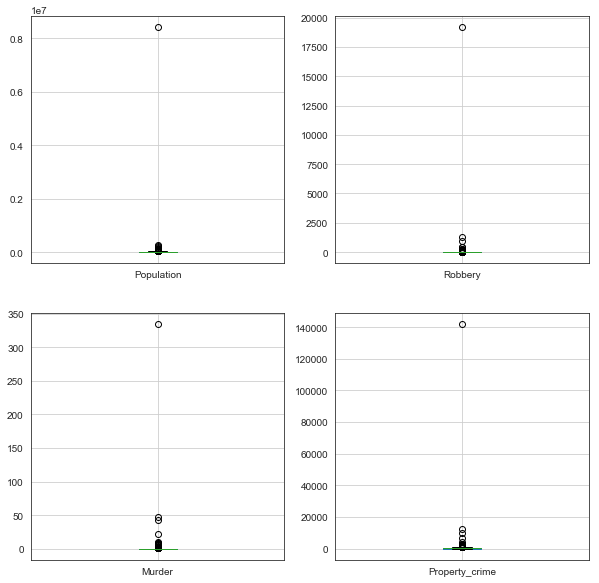

In [12]:
# inspect each column to see if there is any potential outlier
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
NY_crime_2013_clean.boxplot(column='Population', ax=ax[0][0])
NY_crime_2013_clean.boxplot(column='Murder', ax=ax[1][0])
NY_crime_2013_clean.boxplot(column='Robbery', ax=ax[0][1])
NY_crime_2013_clean.boxplot(column='Property_crime', ax=ax[1][1])
plt.show()

In [25]:
# clean up the outliers
NY_crime_2013_clean = NY_crime_2013_clean[NY_crime_2013_clean['Population'] < 8000000]
NY_crime_2013_clean = NY_crime_2013_clean[NY_crime_2013_clean['Murder'] < 300]
NY_crime_2013_clean = NY_crime_2013_clean[NY_crime_2013_clean['Robbery'] < 17500]
NY_crime_2013_clean = NY_crime_2013_clean[NY_crime_2013_clean['Property_crime'] < 120000]

In [28]:
# create another column population square
NY_crime_2013_clean['Population_sq'] = np.square(NY_crime_2013_clean['Population'])

In [31]:
# rearrange the column order
NY_crime_2013_clean = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder',  
                                           'Robbery', 'Property_crime']]

In [32]:
NY_crime_2013_clean.head()

,Population,Population_sq,Murder,Robbery,Property_crime
0,1861.0,3.463321e+06,0.0,0.0,12.0
1,2577.0,6.640929e+06,0.0,0.0,24.0
2,2846.0,8.099716e+06,0.0,0.0,16.0
3,97956.0,9.595378e+09,8.0,227.0,4090.0
4,6388.0,4.080654e+07,0.0,4.0,223.0


In [33]:
NY_crime_2013.shape

(351, 12)

In [46]:
# appraoch 4
# using original Murder and Robbery data without categorizing them
regr = LinearRegression()
X4 = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder', 'Robbery']]
Y = NY_crime_2013_clean['Property_crime']
regr.fit(X4, Y)
predict = regr.predict(X4)
residue = Y - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X4, Y))


Coefficients: 
 [ 2.05519792e-02 -7.19468320e-08  1.02643383e+02  5.13001360e+00]

Intercept: 
 -25.039858198831496

R-squared:
0.939283140822447


In [59]:
# check the p-value of each coefficient
linear_formula = 'Property_crime ~ Population+Population_sq+Murder+Robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=NY_crime_2013_clean).fit()

In [60]:
lm.params

Intercept       -2.503986e+01
Population       2.055198e-02
Population_sq   -7.194683e-08
Murder           1.026434e+02
Robbery          5.130014e+00
dtype: float64

In [61]:
lm.pvalues

Intercept        1.855630e-01
Population       7.640551e-53
Population_sq    1.275907e-11
Murder           4.137181e-12
Robbery          7.714970e-11
dtype: float64

In [62]:
lm.rsquared

0.9392831408224471

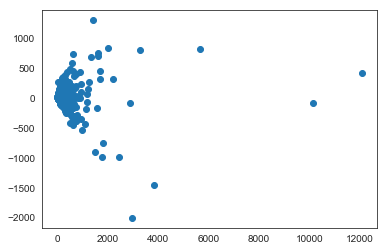

In [48]:
plt.scatter(predict, residue)
plt.show()

In [34]:
# repeat the data processing with the testing dataset
# drop the Rape (revised definition)1 column
CA_crime_2013.drop(CA_crime_2013.columns[4], axis=1, inplace=True)

# keep only population, murder and robbery as feature columns and propery crime as target column
col = CA_crime_2013.columns
CA_crime_2013_clean = CA_crime_2013[[col[1], col[3], col[5], col[7]]]

# rename column
CA_crime_2013_clean.rename(columns={CA_crime_2013_clean.columns[1]: 'Murder', 
                                    CA_crime_2013_clean.columns[3]: 'Property_crime'}, inplace=True)

# drop rows if any column of that row has NaN
CA_crime_2013_clean.dropna(inplace=True)

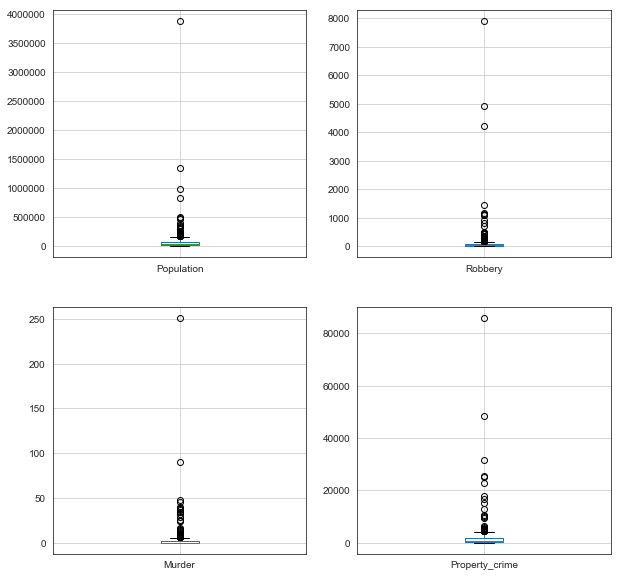

In [36]:
# inspect each column to see if there is any potential outlier
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
CA_crime_2013_clean.boxplot(column='Population', ax=ax[0][0])
CA_crime_2013_clean.boxplot(column='Murder', ax=ax[1][0])
CA_crime_2013_clean.boxplot(column='Robbery', ax=ax[0][1])
CA_crime_2013_clean.boxplot(column='Property_crime', ax=ax[1][1])
plt.show()

In [37]:
# clean up the outliers
CA_crime_2013_clean = CA_crime_2013_clean[CA_crime_2013_clean['Population'] < 750000]
CA_crime_2013_clean = CA_crime_2013_clean[CA_crime_2013_clean['Murder'] < 50]
CA_crime_2013_clean = CA_crime_2013_clean[CA_crime_2013_clean['Robbery'] < 2000]
CA_crime_2013_clean = CA_crime_2013_clean[CA_crime_2013_clean['Property_crime'] < 40000]

In [38]:
# create another column population square
CA_crime_2013_clean['Population_sq'] = np.square(CA_crime_2013_clean['Population'])

In [39]:
# rearrange the column order
CA_crime_2013_clean = CA_crime_2013_clean[['Population', 'Population_sq', 'Murder',  
                                           'Robbery', 'Property_crime']]

In [40]:
CA_crime_2013_clean.head()

,Population,Population_sq,Murder,Robbery,Property_crime
0,31165.0,9.712572e+08,2.0,52.0,886.0
1,20762.0,4.310606e+08,0.0,10.0,306.0
2,76206.0,5.807354e+09,0.0,85.0,1902.0
3,19104.0,3.649628e+08,0.0,24.0,557.0
4,84710.0,7.175784e+09,1.0,81.0,1774.0


In [49]:
# use approach 4 from the previous assignment since it has the highest R square
X_CA = CA_crime_2013_clean[['Population', 'Population_sq', 'Murder', 'Robbery']]
Y_CA = CA_crime_2013_clean['Property_crime']
predict = regr.predict(X_CA)
residue = Y_CA - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_CA, Y_CA))


Coefficients: 
 [ 2.05519792e-02 -7.19468320e-08  1.02643383e+02  5.13001360e+00]

Intercept: 
 -25.039858198831496

R-squared:
0.4119777875063345


From above, we can see there might be an overfit issue since the R square on the new dataset is a lot lower, we will try another approach

In [50]:
# convert murder and robbery column to categorical variable
NY_crime_2013_clean['Murder_cat'] = np.where(NY_crime_2013_clean['Murder'] > 0, 1, 0)
NY_crime_2013_clean['Robbery_cat'] = np.where(NY_crime_2013_clean['Robbery'] > 0, 1, 0)

In [51]:
# rearrange the column order
NY_crime_2013_clean = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder', 'Murder_cat',  
                                           'Robbery', 'Robbery_cat', 'Property_crime']]
NY_crime_2013_clean.head()

,Population,Population_sq,Murder,Murder_cat,Robbery,Robbery_cat,Property_crime
0,1861.0,3.463321e+06,0.0,0,0.0,0,12.0
1,2577.0,6.640929e+06,0.0,0,0.0,0,24.0
2,2846.0,8.099716e+06,0.0,0,0.0,0,16.0
3,97956.0,9.595378e+09,8.0,1,227.0,1,4090.0
4,6388.0,4.080654e+07,0.0,0,4.0,1,223.0


In [52]:
# approach 3
# adding feature interaction between Murder and Robbery, adding more weight if Murder and Robbery occur at the 
# same time, in other words, both equal to 1
NY_crime_2013_clean['interaction'] = np.where((NY_crime_2013_clean['Murder'] == 1) & 
                                              (NY_crime_2013_clean['Robbery'] == 1),
                                              2, 0)
X3 = NY_crime_2013_clean[['Population', 'Population_sq', 'Murder_cat', 'Robbery_cat', 'interaction']]
regr.fit(X3, Y)
predict = regr.predict(X3)
residue = Y - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X3, Y))


Coefficients: 
 [ 1.20858758e-02  1.17379037e-07  2.52393185e+02  1.02026190e+02
 -1.90898080e+02]

Intercept: 
 -13.384098371504706

R-squared:
0.846151761415821


In [55]:
# check the p-value of each coefficient
linear_formula = 'Property_crime ~ Population+Population_sq+Murder_cat+Robbery_cat+interaction'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=NY_crime_2013_clean).fit()

In [56]:
lm.params

Intercept       -1.338410e+01
Population       1.208588e-02
Population_sq    1.173790e-07
Murder_cat       2.523932e+02
Robbery_cat      1.020262e+02
interaction     -1.908981e+02
dtype: float64

In [57]:
lm.pvalues

Intercept        7.096996e-01
Population       8.303756e-08
Population_sq    3.554228e-25
Murder_cat       2.252327e-03
Robbery_cat      4.823064e-02
interaction      5.607271e-02
dtype: float64

In [58]:
lm.rsquared

0.846151761415821

In [53]:
# convert murder and robbery column to categorical variable
CA_crime_2013_clean['Murder_cat'] = np.where(CA_crime_2013_clean['Murder'] > 0, 1, 0)
CA_crime_2013_clean['Robbery_cat'] = np.where(CA_crime_2013_clean['Robbery'] > 0, 1, 0)

# rearrange the column order
CA_crime_2013_clean = CA_crime_2013_clean[['Population', 'Population_sq', 'Murder', 'Murder_cat',  
                                           'Robbery', 'Robbery_cat', 'Property_crime']]
CA_crime_2013_clean.head()

,Population,Population_sq,Murder,Murder_cat,Robbery,Robbery_cat,Property_crime
0,31165.0,9.712572e+08,2.0,1,52.0,1,886.0
1,20762.0,4.310606e+08,0.0,0,10.0,1,306.0
2,76206.0,5.807354e+09,0.0,0,85.0,1,1902.0
3,19104.0,3.649628e+08,0.0,0,24.0,1,557.0
4,84710.0,7.175784e+09,1.0,1,81.0,1,1774.0


In [54]:
# use approach 3 to test the model
CA_crime_2013_clean['interaction'] = np.where((CA_crime_2013_clean['Murder'] == 1) & 
                                              (CA_crime_2013_clean['Robbery'] == 1),
                                              2, 0)
X_CA_2 = CA_crime_2013_clean[['Population', 'Population_sq', 'Murder_cat', 'Robbery_cat', 'interaction']]
predict = regr.predict(X_CA_2)
residue = Y_CA - predict

# Inspect the result
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_CA_2, Y_CA))


Coefficients: 
 [ 1.20858758e-02  1.17379037e-07  2.52393185e+02  1.02026190e+02
 -1.90898080e+02]

Intercept: 
 -13.384098371504706

R-squared:
0.41410745966400586
